In [44]:
import mlflow

mlflow.set_tracking_uri("http://aiserver.tzp.haw-landshut.de:5050")
mlflow.set_experiment("RandomForestClassifier_paperd")

logged_model = 'runs:/edb83ffbcf5c459c833dd1d3d639b832/randomForest'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# 1. Parse files

In [45]:
import os
import json
import re
import numpy as np

def parse_acceleration_data(folder_path):
    """
    Parses acceleration data from JSON files in a folder.

    Args:
        folder_path (str): Path to the folder containing the JSON files.

    Returns:
        Tuple[numpy.ndarray, numpy.ndarray]: A tuple containing the acceleration data and the labels.

    Raises:
        ValueError: If the JSON files do not contain acceleration data with the expected format
                    or if the labels cannot be extracted from the filenames.
    """
    file_names = [f for f in os.listdir(folder_path) if f.endswith('.json')]
    num_files = len(file_names)
    acceleration_data = np.empty((num_files, 40000, 3))
    labels = np.empty((num_files, 1), dtype=np.object)

    for i, file_name in enumerate(file_names):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            json_data = json.load(file)

        if 'x' not in json_data or 'y' not in json_data or 'z' not in json_data:
            raise ValueError(f'Acceleration data not found in {file_path}')

        x_values = json_data['x']
        y_values = json_data['y']
        z_values = json_data['z']

        if len(x_values) != 40000 or len(y_values) != 40000 or len(z_values) != 40000:
            raise ValueError(f'Acceleration data size mismatch in {file_path}')

        acceleration_data[i] = np.array([x_values, y_values, z_values]).T

        # Extract label from the filename using regular expressions
        match = re.search(r'_scenario_(.*?)\.json', file_name)
        if match is None:
            raise ValueError(f'Label extraction error in {file_path}')

        label = match.group(1)
        print(label)
        labels[i] = label

    return acceleration_data, labels


data = parse_acceleration_data("./woodenInsertData/20230525/")

In [46]:
folder_path = './woodenInsertData/20230613/'

try:
    acceleration_array, labels = parse_acceleration_data(folder_path)
    print(acceleration_array.shape)  # Output the shape of the acceleration array
    print(labels.shape)  # Output the shape of the labels array
except ValueError as e:
    print(f'Error: {e}')

/tmp/ipykernel_1581682/4029045582.py:23: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = np.empty((num_files, 1), dtype=np.object)


liftingandlowering
walking
liftingandlowering
walking
movingtable
rollerconveyor
largeloadcarriertrolley
idle
rollerconveyor
walking
idle
rollerconveyor
movingtable
movingtable
rollerconveyor
rollerconveyor
palletjack
liftingandlowering
rollerconveyor
idle
liftingandlowering
liftingandlowering
liftingandlowering
idle
liftingandlowering
sacktrolley
rollerconveyor
rollerconveyor
rotatehorizontally
idle
largeloadcarriertrolley
rotatehorizontally
largeloadcarriertrolley
sacktrolley
movingtable
walking
largeloadcarriertrolley
rotatehorizontally
rotatehorizontally
sacktrolley
liftingandlowering
sacktrolley
idle
rotatehorizontally
sacktrolley
palletjack
largeloadcarriertrolley
rollerconveyor
largeloadcarriertrolley
palletjack
idle
rollerconveyor
palletjack
largeloadcarriertrolley
liftingandlowering
liftingandlowering
sacktrolley
rollerconveyor
idle
sacktrolley
sacktrolley
rotatehorizontally
largeloadcarriertrolley
liftingandlowering
walking
walking
palletjack
movingtable
movingtable
rollercon

In [90]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
import random
def getIndicesOfFirstOccurranceOfLabel(searchlabel:str, y):
    labels = np.unique(y)
    if searchlabel not in labels:
        raise Exception("invalid label", "available labels: ", labels)
    indices = []
    for idx, label in enumerate(y):
        if label[0] == searchlabel:
            indices.append(idx)
    return indices

def plotRandomDatapointsOfLabel(searchLabel, X, y, type="line", axis=["z"]):
    plt.rcParams["figure.figsize"] = (20, 3)
    #searchLabel = "Gehen"
    
    indices = getIndicesOfFirstOccurranceOfLabel(searchLabel,y)
    randomIndex = random.randint(0, len(indices)-1)
    #randomIndex = indices[3]
    print(y[indices[randomIndex]], "Anzahl Aufnahmen: ", len(indices))
    if type=="line":
        plt.plot(X[indices[randomIndex]][:,0:3])
        plt.ylabel("Beschleunigung in g")
        plt.xlabel("Anzahl der Datenpunkte")
    plt.show()
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

def plotDatapointsViaIndicesOfLabel(X, y, indices, type="line", axis=["z"]):
    plt.rcParams["figure.figsize"] = (20, 3)
    #searchLabel = "Gehen"
    
    for index in indices:
    #randomIndex = indices[3]
        print("index: ", index, "label: ", y[index])#print(y[indices[index]], "Anzahl Aufnahmen: ", len(indices))
        if type=="line":
            plt.plot(X[index])
            plt.ylabel("Beschleunigung in g")
            plt.xlabel("Anzahl der Datenpunkte")
        plt.show()
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

def plotRandomDatapointsOfEachLabel(X, y, type="line", axis=["z"]):
    labels = np.unique(y)
    for label in labels:
        plotRandomDatapointsOfLabel(label, X, y, type)

In [48]:
print(acceleration_array[0][:,0:1].shape)

(40000, 1)


In [49]:
labels.shape

(136, 1)

In [50]:
acceleration_array.shape

(136, 40000, 3)

In [51]:
acceleration_array

array([[[ 0.004095  ,  0.83926046, -0.006006  ],
        [ 0.007449  ,  0.84312147, -0.003471  ],
        [ 0.0060255 ,  0.85330045, -0.0032175 ],
        ...,
        [-0.01092   ,  0.0906555 , -0.82584447],
        [-0.01404   ,  0.08743799, -0.82999796],
        [-0.0144495 ,  0.0874575 , -0.83186996]],

       [[ 0.013299  , -0.0587925 , -0.71867245],
        [ 0.0059085 , -0.0640575 , -0.71966696],
        [ 0.0133575 , -0.064038  , -0.72292346],
        ...,
        [-0.023634  ,  0.050895  , -1.191957  ],
        [-0.023634  ,  0.046254  , -1.18979251],
        [-0.0240045 ,  0.0456105 , -1.19189847]],

       [[ 0.1212315 , -0.0781365 , -1.2594465 ],
        [ 0.12388349, -0.082173  , -1.240044  ],
        [ 0.1249755 , -0.08299199, -1.23846447],
        ...,
        [-0.047346  , -0.1389765 , -1.07316291],
        [-0.047736  , -0.1391325 , -1.07302642],
        [-0.050583  , -0.1427595 , -1.07279241]],

       ...,

       [[ 0.10180949, -0.063843  , -0.93576598],
        [ 0

# 2. Apply Feature Engineering (Low-pass + 60x feature Extraction)
I really should create a webservice that handles all the data processing like feature extraction via a Web Api...

In [52]:
import numpy as np
from scipy import signal
def applyLowPassFilter(X):
    # set the filter parameters
    fs = 4000  # sampling frequency in Hz
    fc = 1100  # cutoff frequency in Hz
    order = 4  # filter order

    # calculate the filter coefficients
    b, a = signal.butter(order, fc / (fs / 2), 'low')

    # apply the filter to each recording of acceleration data
    filtered_accel_data = np.zeros_like(X)

    for i in range(X.shape[0]):
        filtered_accel_data[i,:,:] = signal.filtfilt(b, a, X[i,:,:], axis=0)
    print("X:", X.shape)
    return filtered_accel_data

In [53]:
data = applyLowPassFilter(acceleration_array)

X: (136, 40000, 3)


In [54]:
data.shape

(136, 40000, 3)

['idle'] Anzahl Aufnahmen:  15


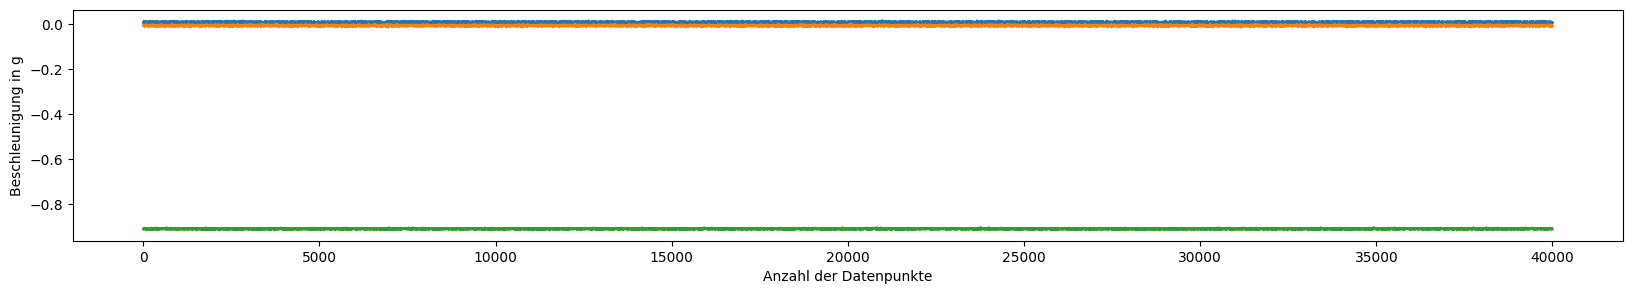

['largeloadcarriertrolley'] Anzahl Aufnahmen:  15


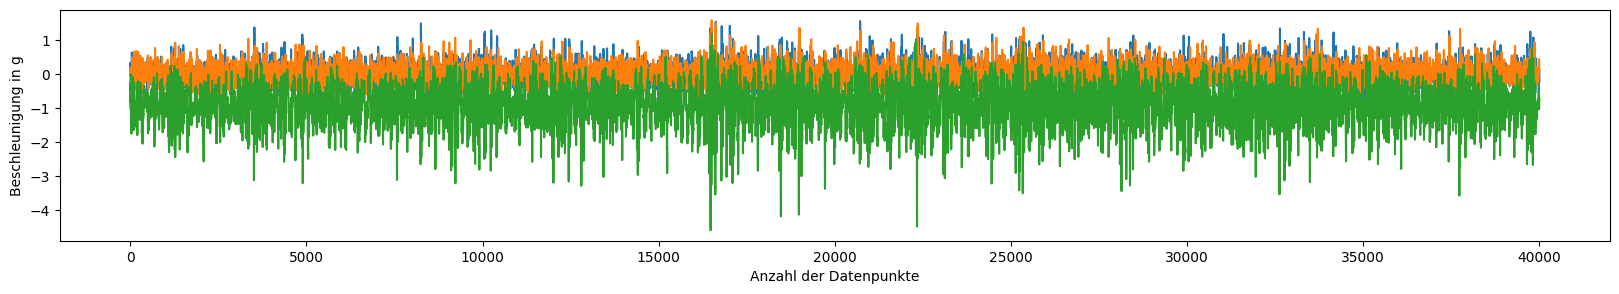

['liftingandlowering'] Anzahl Aufnahmen:  16


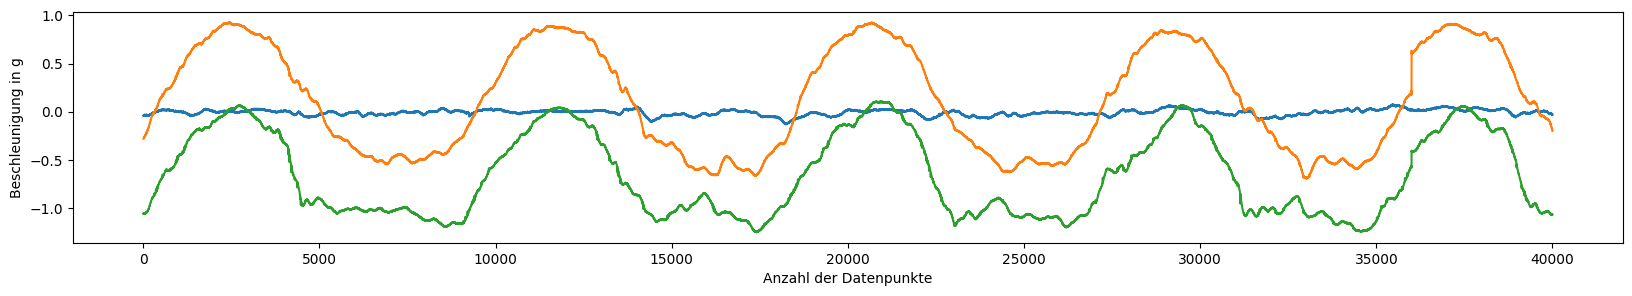

['movingtable'] Anzahl Aufnahmen:  15


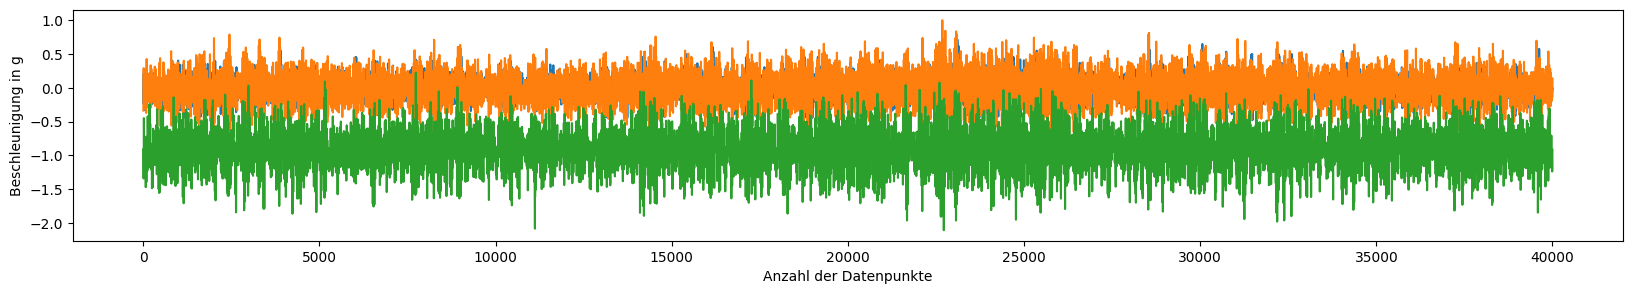

['palletjack'] Anzahl Aufnahmen:  15


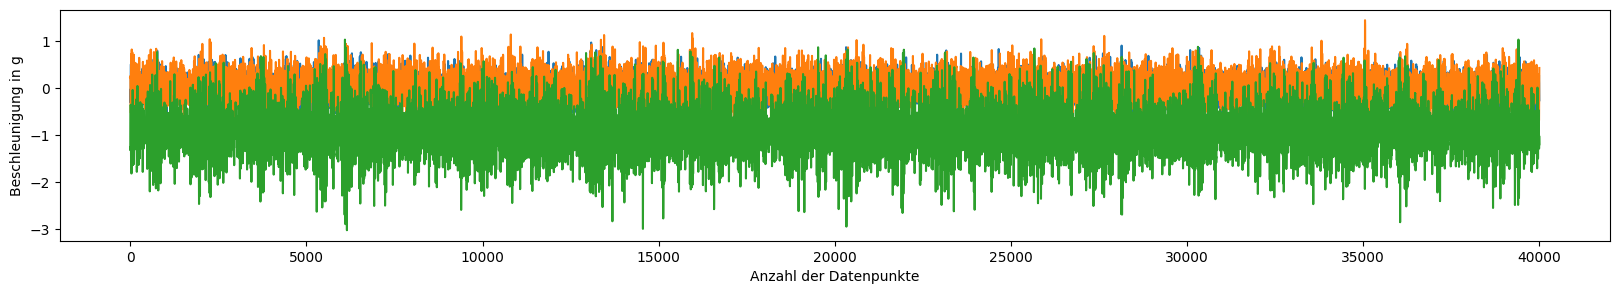

['rollerconveyor'] Anzahl Aufnahmen:  15


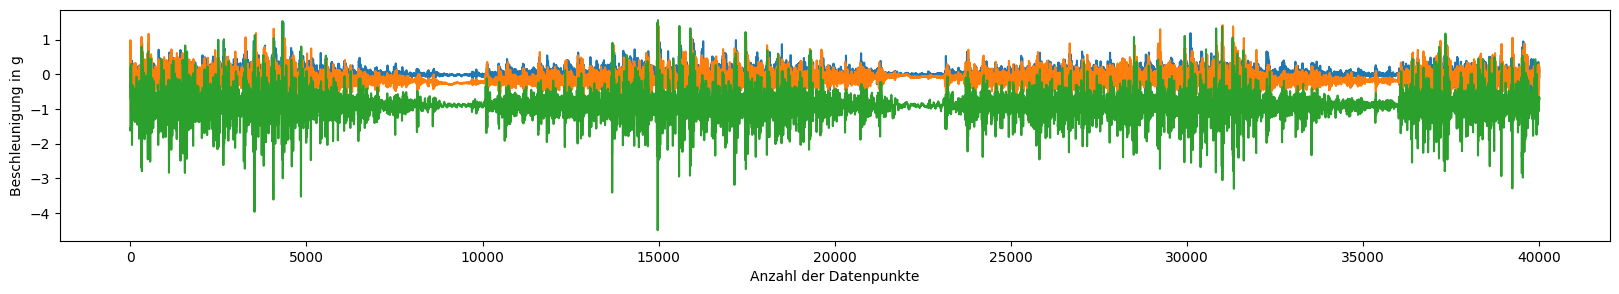

['rotatehorizontally'] Anzahl Aufnahmen:  15


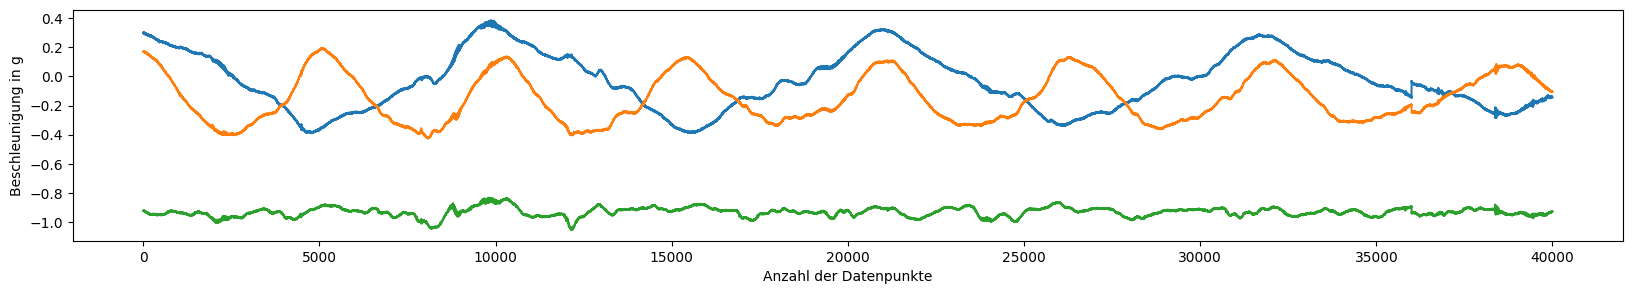

['sacktrolley'] Anzahl Aufnahmen:  15


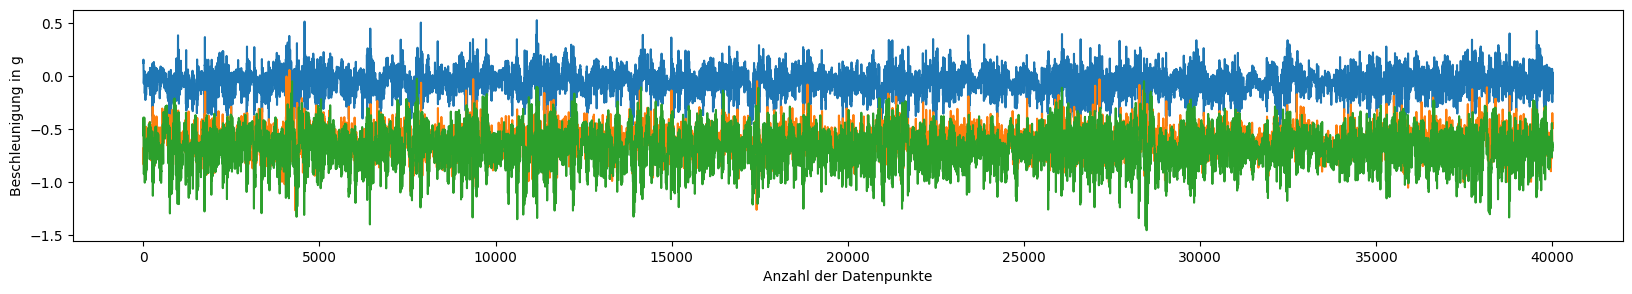

['walking'] Anzahl Aufnahmen:  15


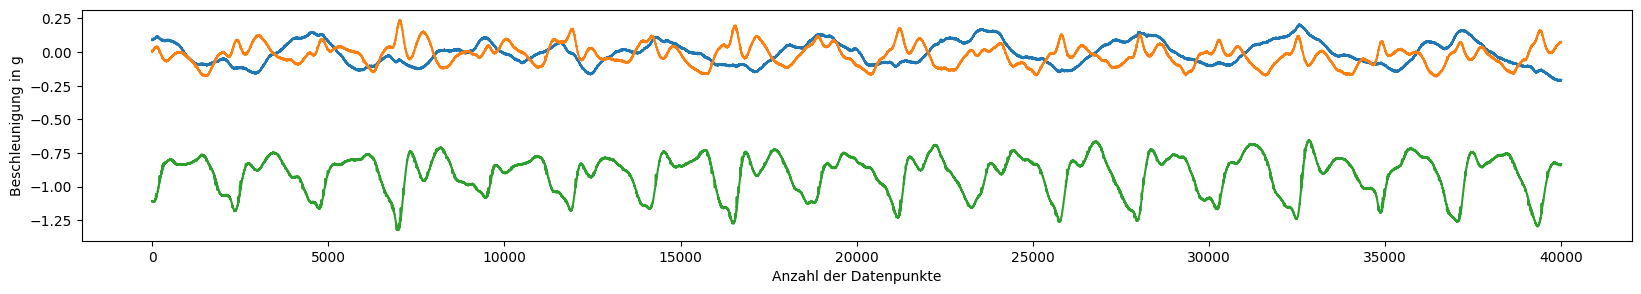

In [59]:
plotRandomDatapointsOfEachLabel(data, labels,type="line")

In [9]:
import numpy as np
from scipy.stats import skew, kurtosis

def extract_features(accel_data):
    # Initialize the result array with zeros
    num_recordings = accel_data.shape[0]
    num_axes = 3
    num_features = 20
    features = np.zeros((num_recordings, num_axes, num_features))

    # Calculate the features for each axis and recording separately
    for recording in range(num_recordings):
        recording_data = accel_data[recording]

        for axis in range(num_axes):
            axis_data = recording_data[:, axis]

            max_value = np.max(axis_data)
            min_value = np.min(axis_data)
            abs_max_value = np.max(np.abs(axis_data))
            abs_min_value = np.min(np.abs(axis_data))
            mean_value = np.mean(axis_data)
            abs_energy_value = np.sum(np.square(axis_data))
            mean_abs_change_value = np.mean(np.abs(np.diff(axis_data)))
            cid_ce_value = np.sum(np.abs(np.diff(axis_data))) / (np.sum(np.abs(axis_data)) + 1e-9)
            std_value = np.std(axis_data)
            var_value = np.var(axis_data)
            count_above_mean_value = np.sum(axis_data > mean_value)
            count_below_mean_value = np.sum(axis_data < mean_value)
            first_position_of_max_value = np.argmax(axis_data)
            first_position_of_min_value = np.argmin(axis_data)
            max_count_value = np.sum(axis_data == max_value)
            min_count_value = np.sum(axis_data == min_value)
            has_large_std_value = int(std_value > np.percentile(axis_data, 95))
            skew_value = skew(axis_data)
            kurtosis_value = kurtosis(axis_data)
            variation_coefficient_value = np.std(axis_data) / np.mean(axis_data)

            # Add the features to the result array
            features[recording, axis] = np.array([
                max_value, min_value, abs_max_value, abs_min_value, mean_value,
                abs_energy_value, mean_abs_change_value, cid_ce_value, std_value,
                var_value, count_above_mean_value, count_below_mean_value,
                first_position_of_max_value, first_position_of_min_value,
                max_count_value, min_count_value, has_large_std_value, skew_value,
                kurtosis_value, variation_coefficient_value
            ])

    # Combine the features for all three axes
    features = features.reshape(num_recordings, -1)

    # Return the features as a NumPy array
    return features

In [10]:
data = extract_features(data)

In [11]:
data.shape

(136, 60)

In [12]:
import pandas as pd
dataDF = pd.DataFrame(data)

In [13]:
dataDF

0         1         2             3         4            5   \
0    0.326539 -0.112912  0.326539  2.651473e-06 -0.004525    84.756498   
1    0.182725 -0.201677  0.201677  1.991784e-06 -0.013805   268.210736   
2    0.222034 -0.370564  0.370564  5.152887e-07  0.009332   193.408404   
3    0.232428 -0.195187  0.232428  1.659998e-06 -0.005853   346.977507   
4    0.763186 -0.819395  0.819395  1.603887e-05 -0.025583  1152.106478   
..        ...       ...       ...           ...       ...          ...   
131  0.781292 -0.824519  0.824519  1.692230e-06 -0.025116  1188.249328   
132  1.024191 -0.903309  1.024191  1.565736e-06 -0.021777  1193.881163   
133  0.740357 -0.742318  0.742318  4.102332e-06 -0.019142   967.200142   
134  0.547816 -0.661851  0.661851  3.886133e-06 -0.050905   501.766120   
135  0.854283 -0.897544  0.897544  1.627544e-05 -0.022958  1726.832780   

           6         7         8         9   ...       50       51       52  \
0    0.001431  0.042269  0.045809  0.002098  ...  16066.0  23934.0  18506.0   
1    0.001383  0.019841  0.080714  0.006515  ...  24612.0  15388.0  18156.0   
2    0.001724  0.031861  0.068907  0.004748  ...  19165.0  20835.0  30245.0   
3    0.001374  0.017317  0.092953  0.008640  ...  23019.0  16981.0  25553.0   
4    0.041196  0.307137  0.167774  0.028148  ...  20155.0  19845.0  22792.0   
..        ...       ...       ...       ...  ...      ...      ...      ...   
131  0.042000  0.308271  0.170515  0.029075  ...  20255.0  19745.0  16149.0   
132  0.041423  0.301062  0.171385  0.029373  ...  20079.0  19921.0  31146.0   
133  0.038004  0.312535  0.154316  0.023814  ...  20444.0  19556.0  23011.0   
134  0.035217  0.405041  0.099764  0.009953  ...  20793.0  19207.0  26284.0   
135  0.072015  0.434409  0.206504  0.042644  ...  19792.0  20208.0  38862.0   

          53   54   55   56        57        58        59  
0    36315.0  1.0  1.0  1.0  0.544305 -0.967820 -0.547294  
1    17154.0  1.0  1.0  1.0 -0.744888 -0.636200 -0.171335  
2    39258.0  1.0  1.0  1.0  0.097216 -0.899622 -0.238949  
3    32228.0  1.0  1.0  1.0 -0.411386 -0.897128 -0.163125  
4    28367.0  1.0  1.0  1.0 -0.067637  0.066570 -0.318268  
..       ...  ...  ...  ...       ...       ...       ...  
131  39457.0  1.0  1.0  1.0 -0.056483 -0.006532 -0.340276  
132  14136.0  1.0  1.0  1.0 -0.021088  0.125543 -0.328580  
133  20831.0  1.0  1.0  1.0 -0.120857  0.190153 -0.305436  
134    348.0  1.0  1.0  1.0 -0.294518  0.482042 -0.235650  
135  39361.0  1.0  1.0  1.0  0.019445  0.285885 -0.570698  

[136 rows x 60 columns]

In [14]:
ypred = loaded_model.predict(dataDF)

In [15]:
ypred = np.array([str(item) for item in ypred])  # Convert elements to strings
ypred = np.char.lower(np.char.replace(ypred, ' ', ''))

In [16]:
ypred.shape

(136,)

In [69]:
np.unique(ypred)

array(['idle', 'largeloadcarriertrolley', 'liftingandlowering',
       'palletjack', 'rollerconveyor', 'rotatehorizontally',
       'sacktrolley', 'walking'], dtype='<U23')

In [18]:
labels.shape

(136, 1)

In [60]:
labels = labels.reshape(136)

In [61]:

# Assuming you have the NumPy arrays ypred and labels with shape (135,)
input = {'predicted': ypred, 'actual': labels}
df = pd.DataFrame(input)

# Printing the DataFrame
print(df)


                   predicted              actual
0         liftingandlowering  liftingandlowering
1                    walking             walking
2         liftingandlowering  liftingandlowering
3                    walking             walking
4                 palletjack         movingtable
..                       ...                 ...
131               palletjack         movingtable
132               palletjack         movingtable
133               palletjack         movingtable
134              sacktrolley         sacktrolley
135  largeloadcarriertrolley          palletjack

[136 rows x 2 columns]


In [70]:
df["error"] = df.apply(lambda row: 1 if row["predicted"] != row["actual"] else 0, axis=1)

In [75]:
df["error"].values.shape

(136,)

In [76]:
indicesOfErrors = []
for idx,error in enumerate(df["error"].values):
    if error:
        indicesOfErrors.append(idx)
print(indicesOfErrors)

[4, 8, 12, 13, 16, 17, 20, 21, 22, 24, 34, 40, 45, 47, 49, 53, 54, 55, 63, 67, 68, 71, 76, 81, 87, 88, 97, 99, 101, 102, 103, 104, 105, 111, 118, 121, 122, 126, 130, 131, 132, 133, 135]


index:  4 label:  movingtable


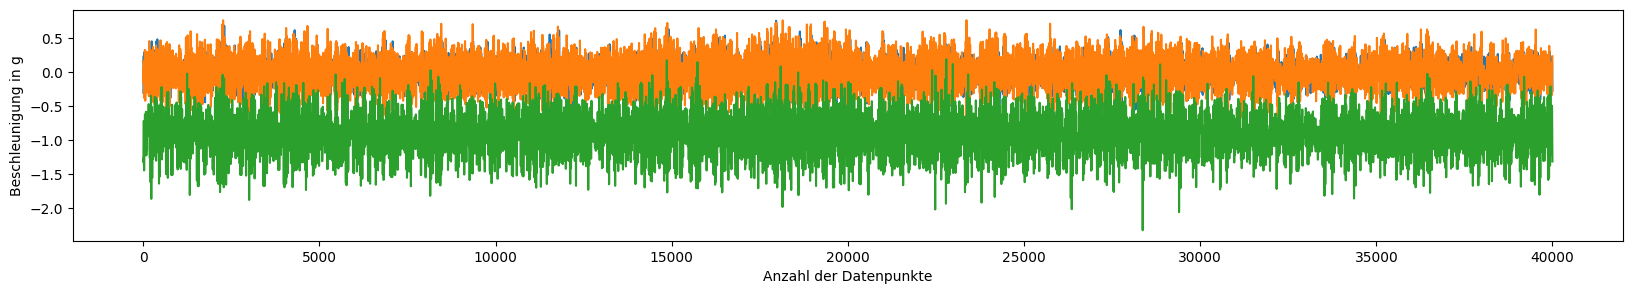

index:  8 label:  rollerconveyor


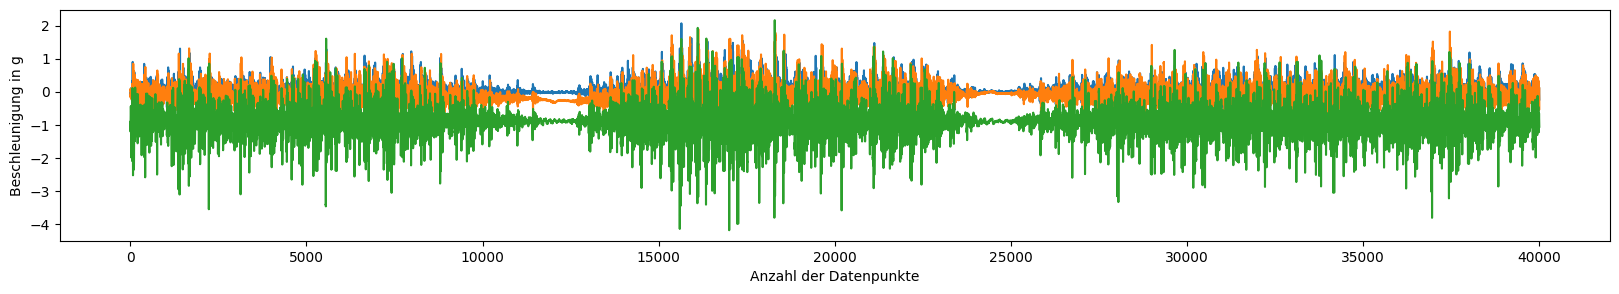

index:  12 label:  movingtable


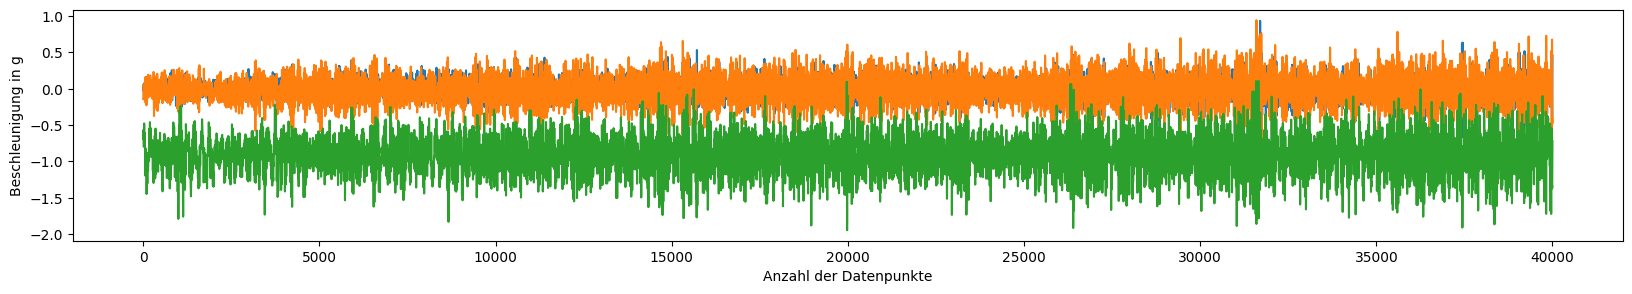

index:  13 label:  movingtable


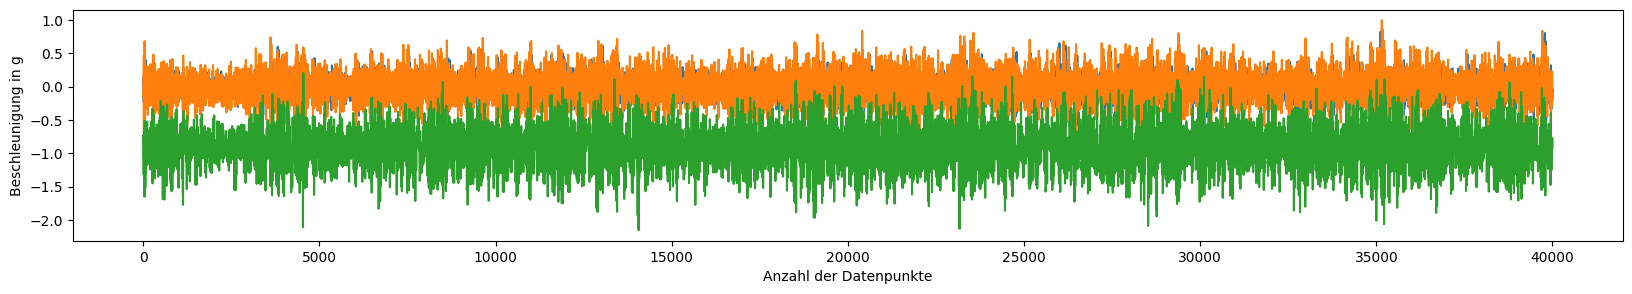

index:  16 label:  palletjack


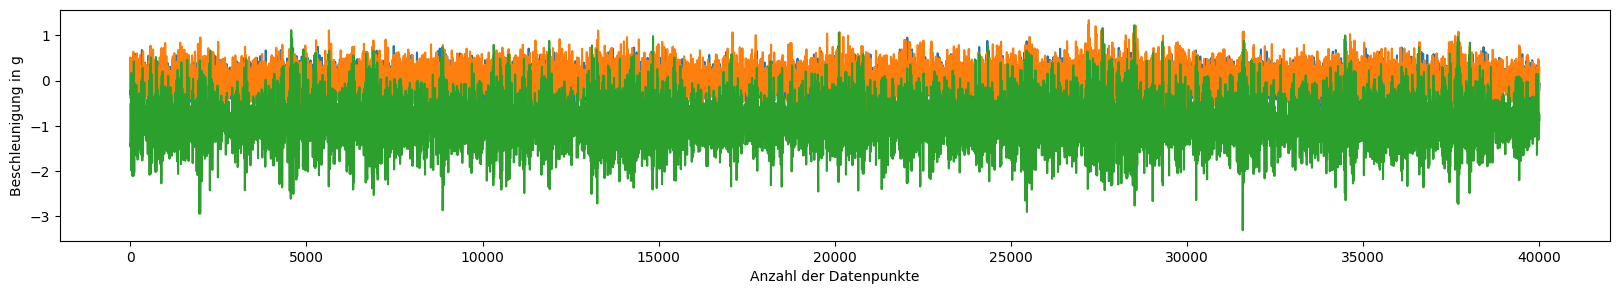

index:  17 label:  liftingandlowering


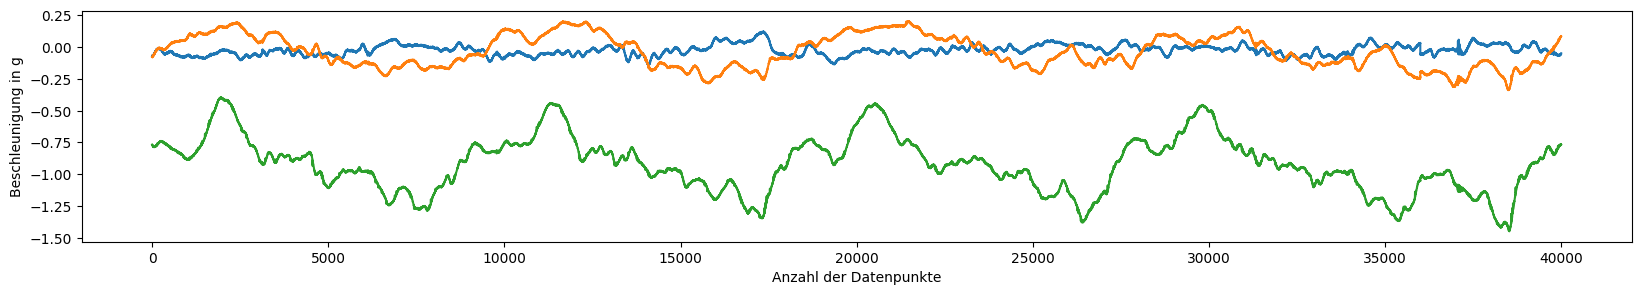

index:  20 label:  liftingandlowering


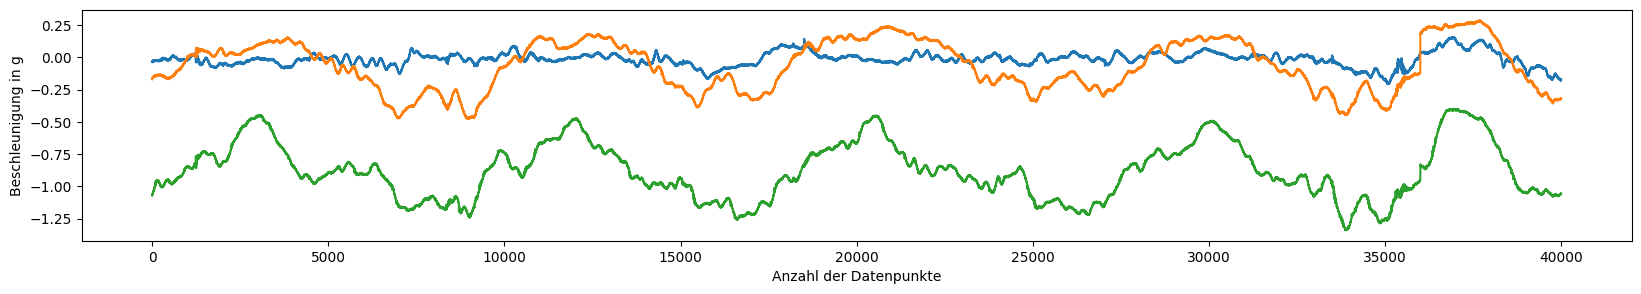

index:  21 label:  liftingandlowering


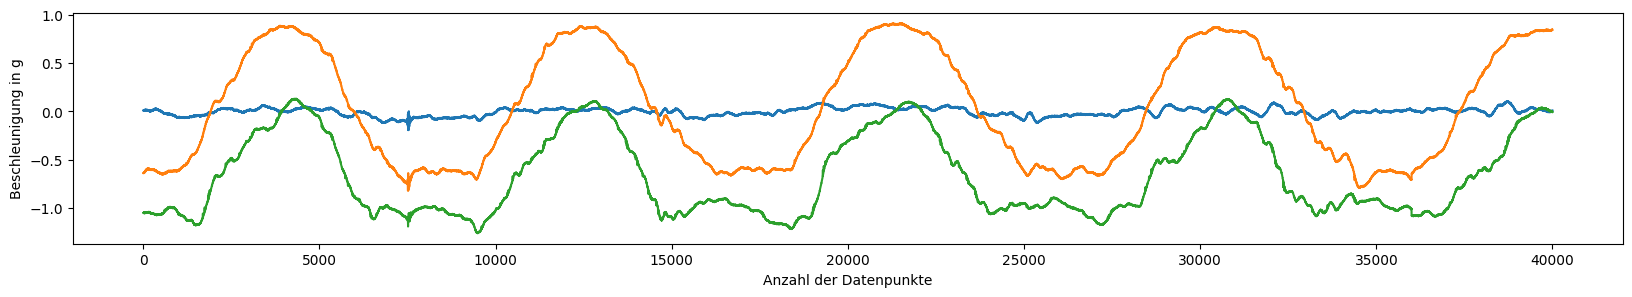

index:  22 label:  liftingandlowering


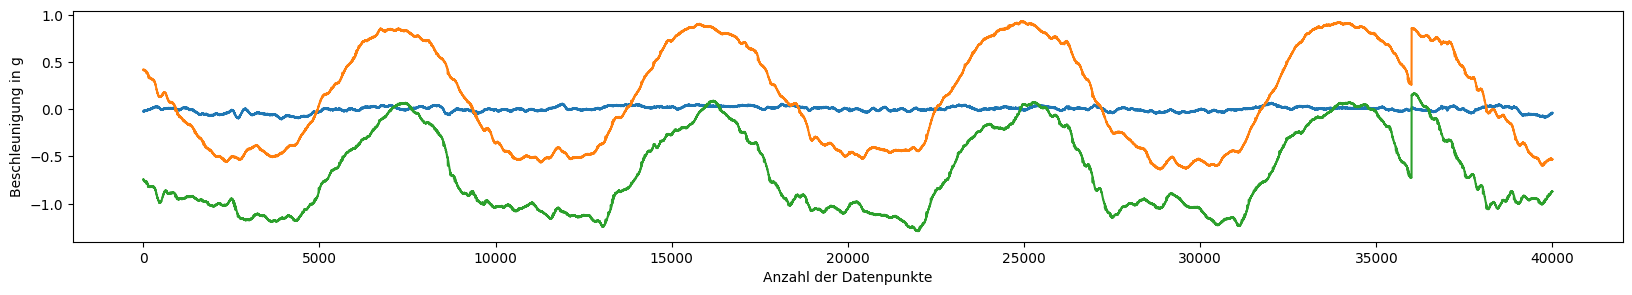

index:  24 label:  liftingandlowering


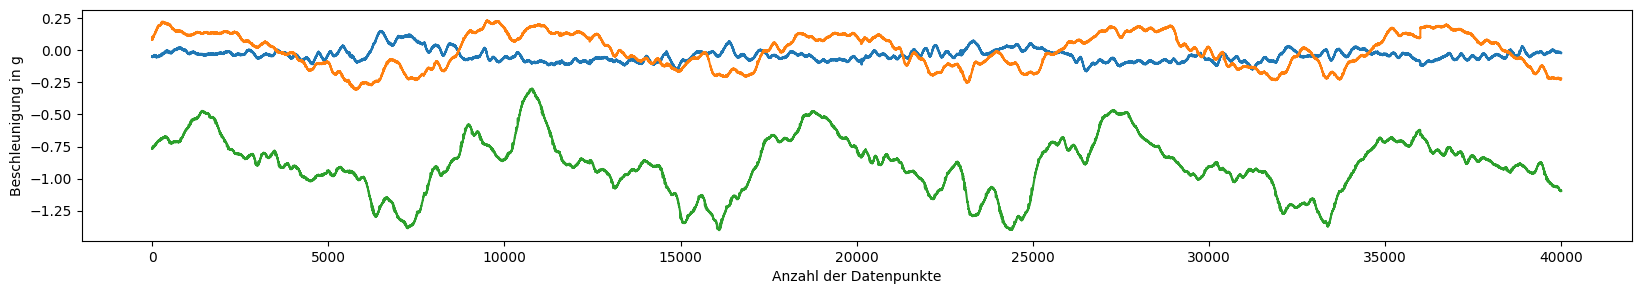

index:  34 label:  movingtable


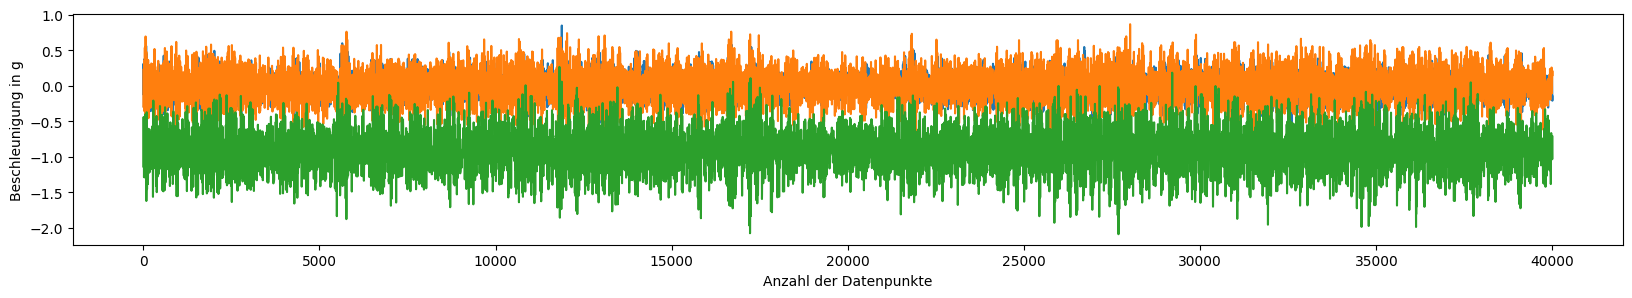

index:  40 label:  liftingandlowering


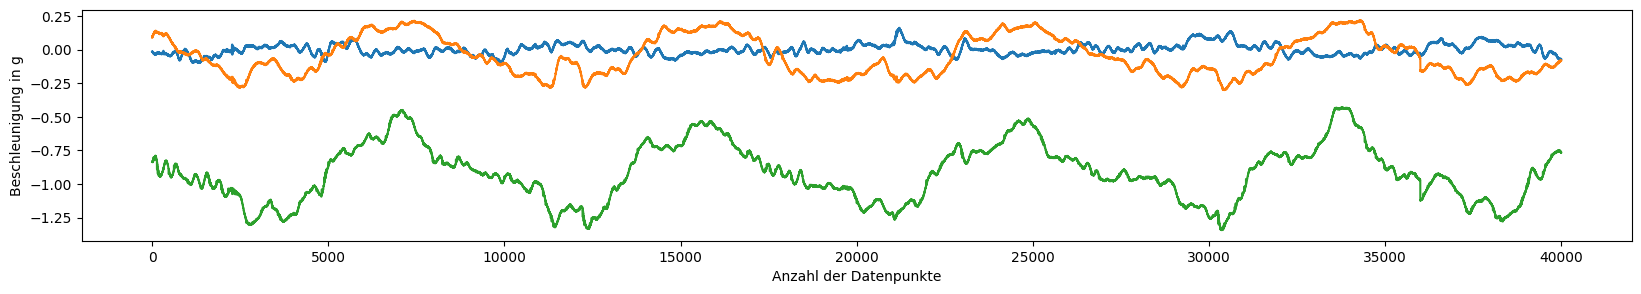

index:  45 label:  palletjack


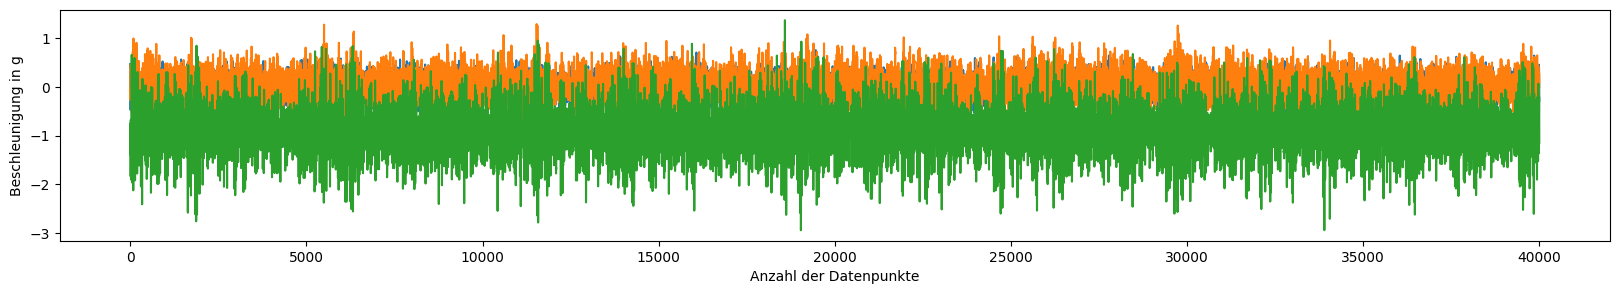

index:  47 label:  rollerconveyor


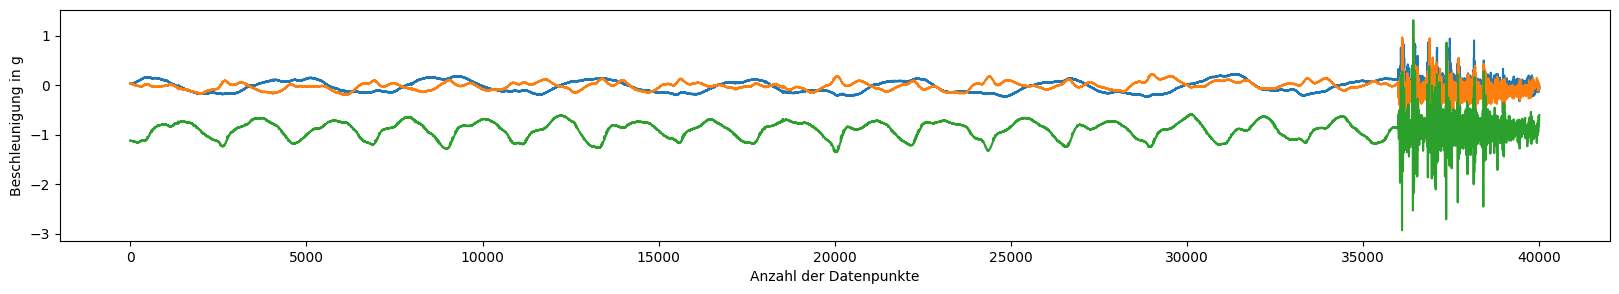

index:  49 label:  palletjack


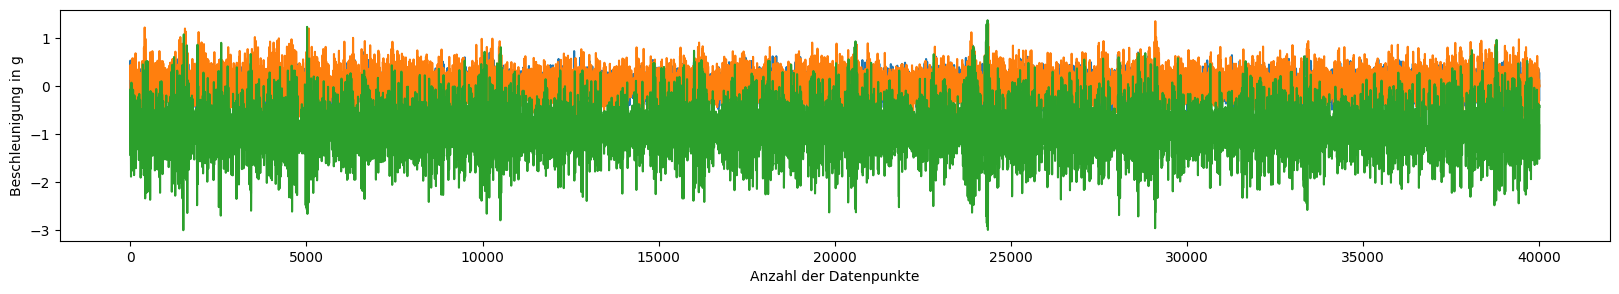

index:  53 label:  largeloadcarriertrolley


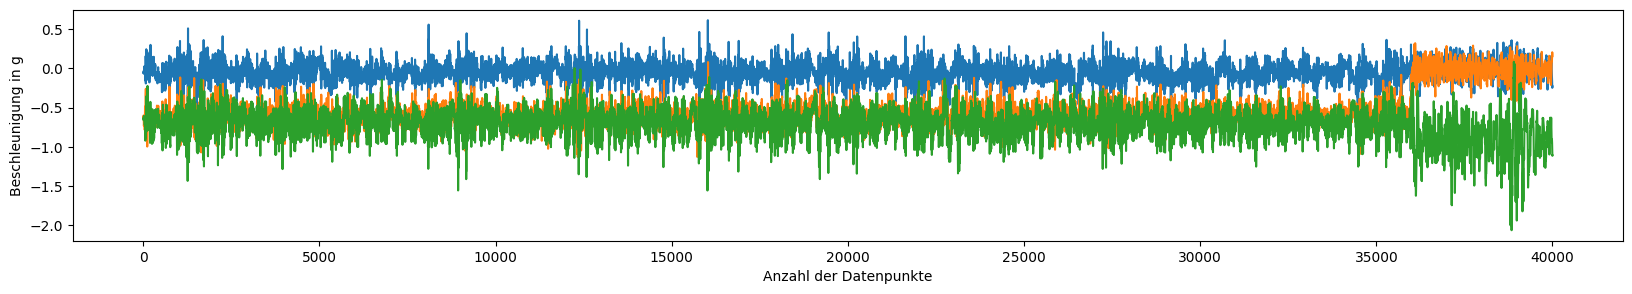

index:  54 label:  liftingandlowering


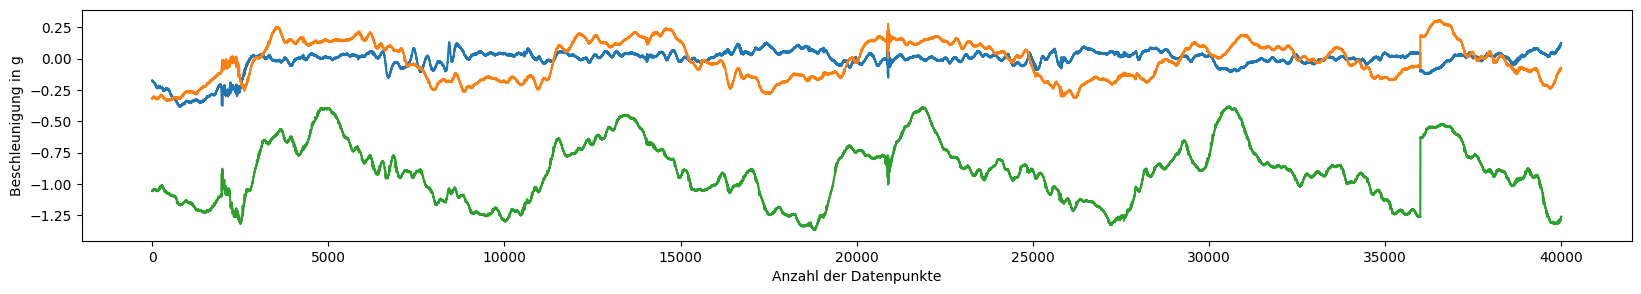

index:  55 label:  liftingandlowering


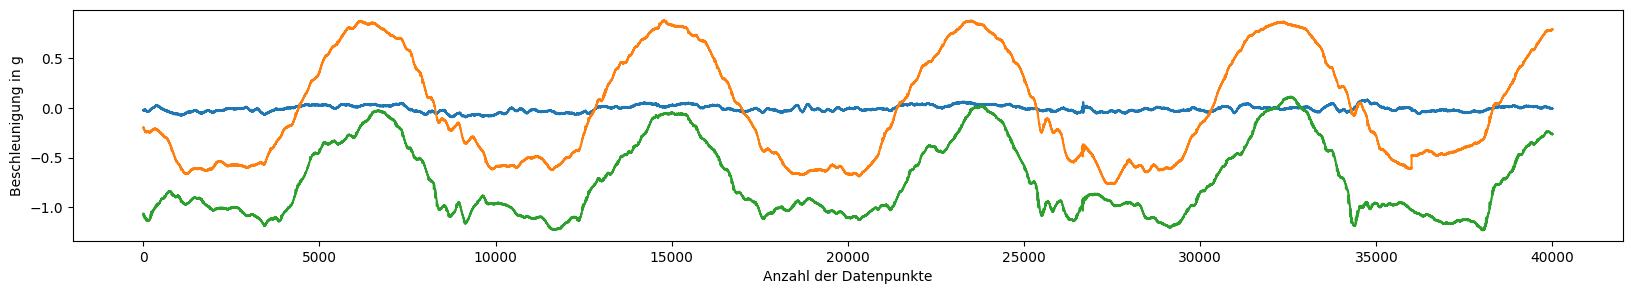

index:  63 label:  liftingandlowering


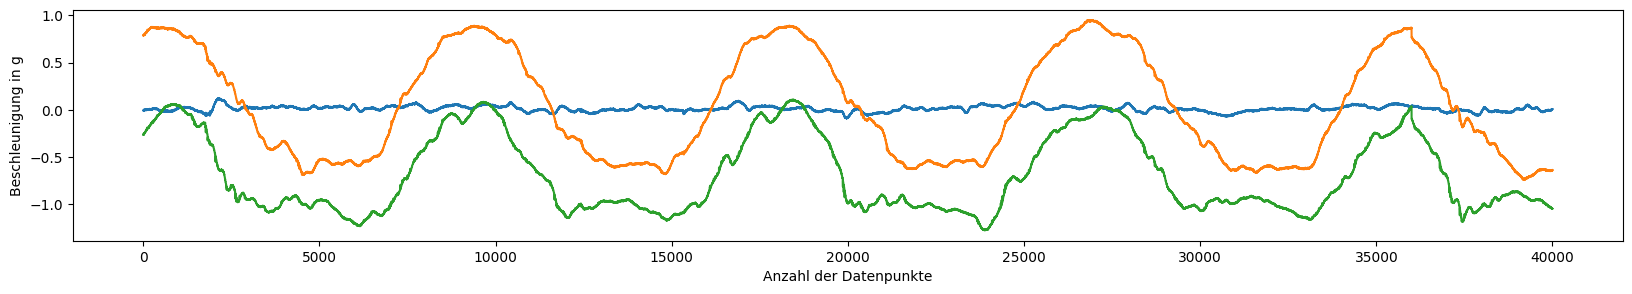

index:  67 label:  movingtable


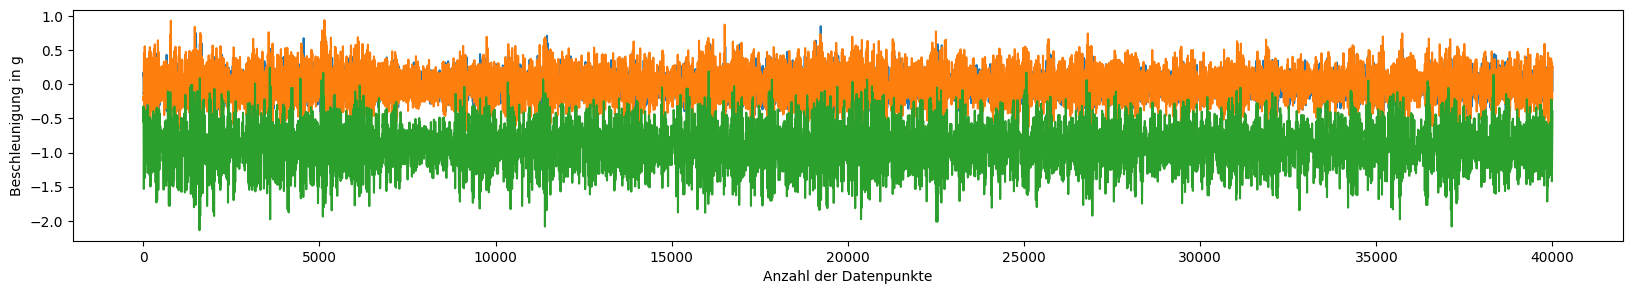

index:  68 label:  movingtable


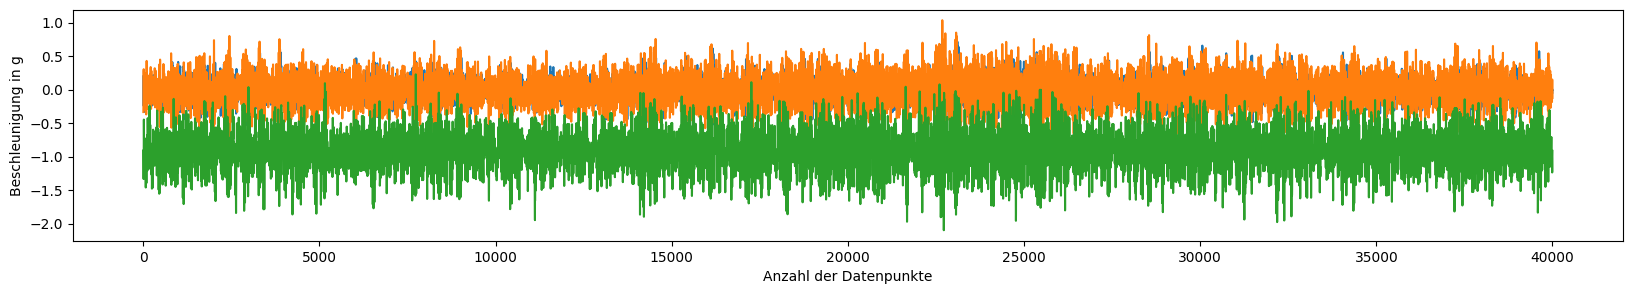

index:  71 label:  movingtable


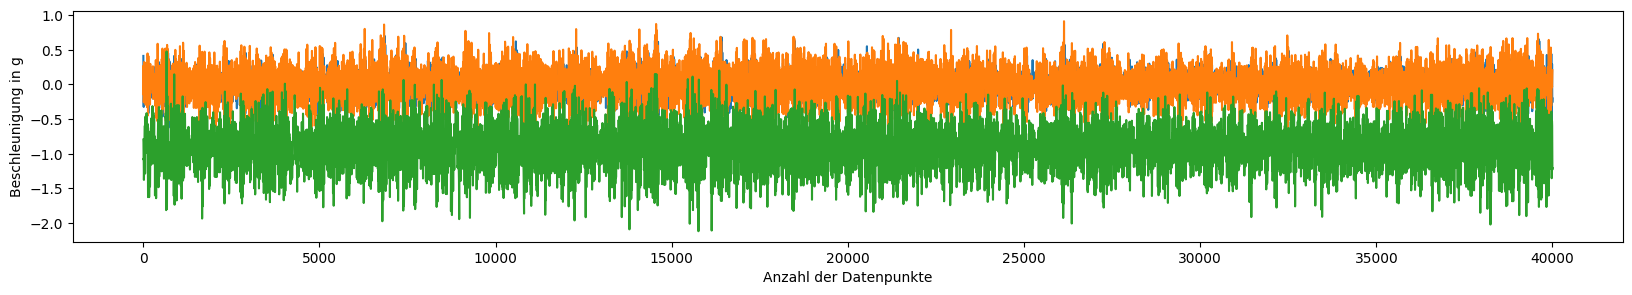

index:  76 label:  liftingandlowering


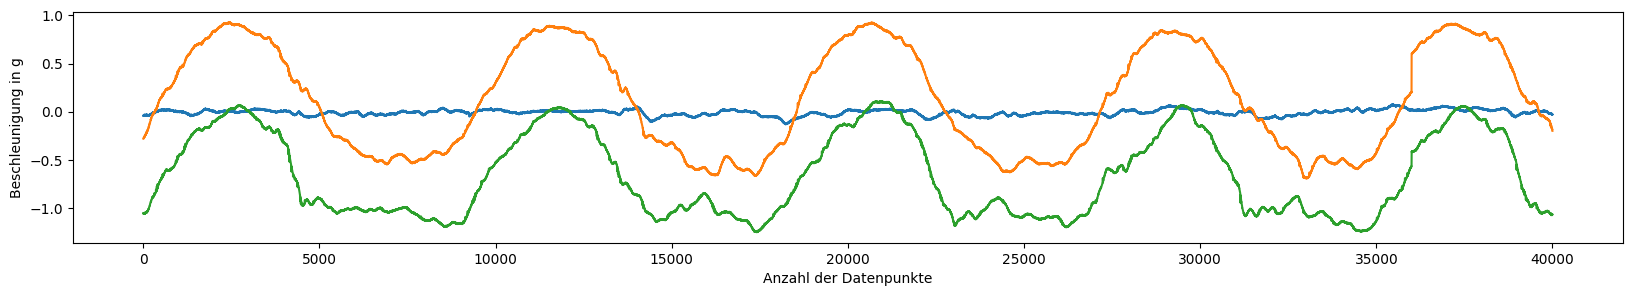

index:  81 label:  palletjack


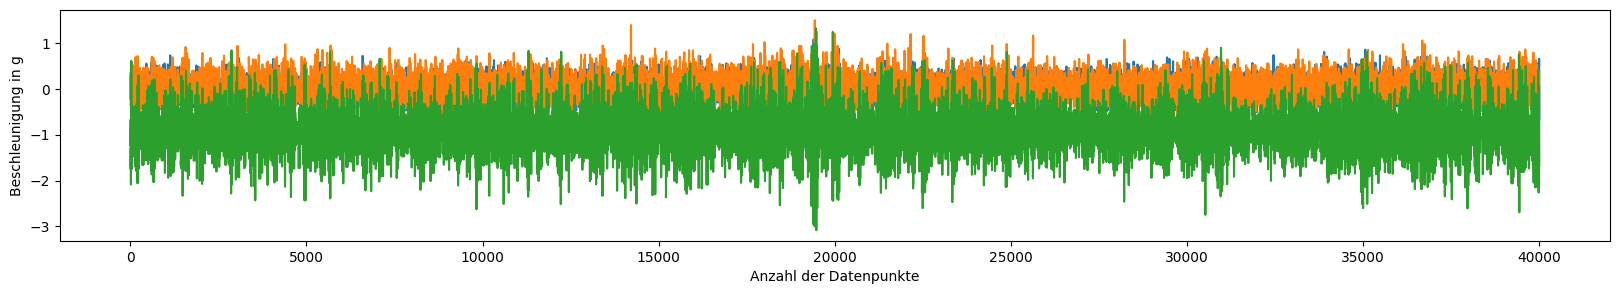

index:  87 label:  palletjack


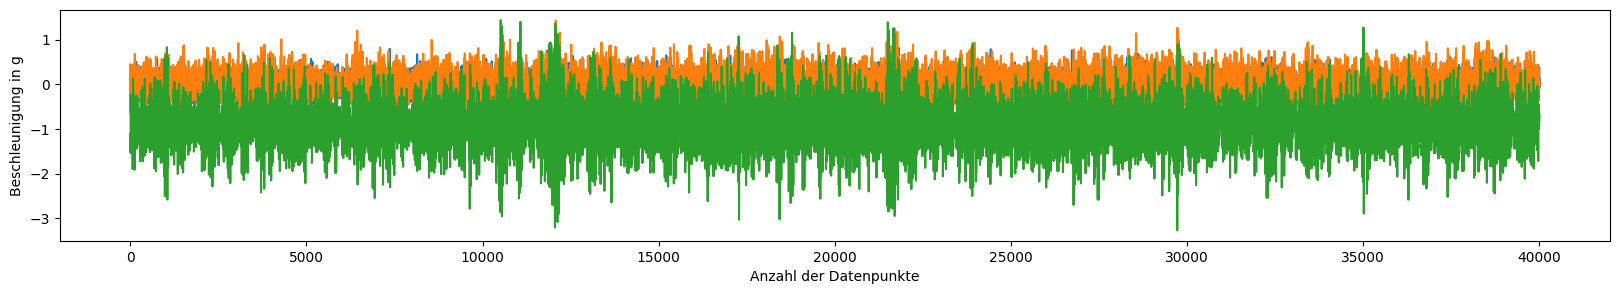

index:  88 label:  liftingandlowering


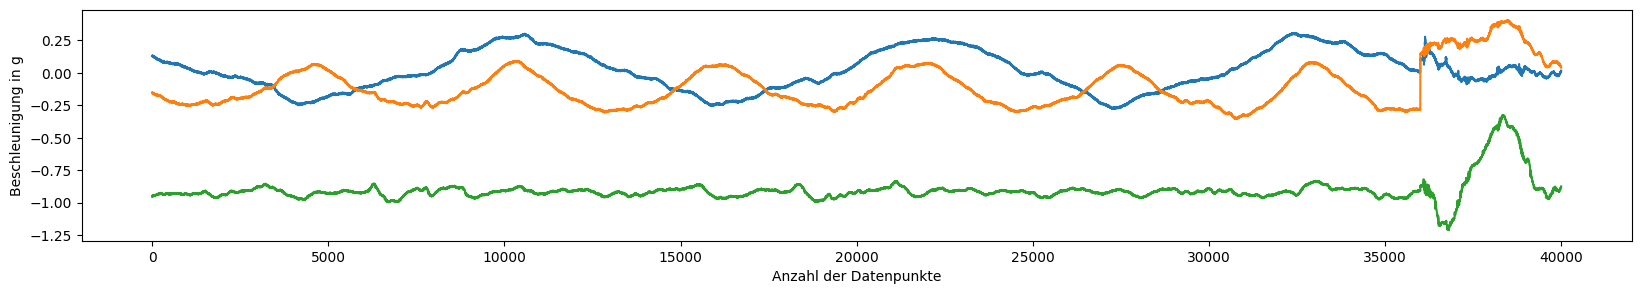

index:  97 label:  movingtable


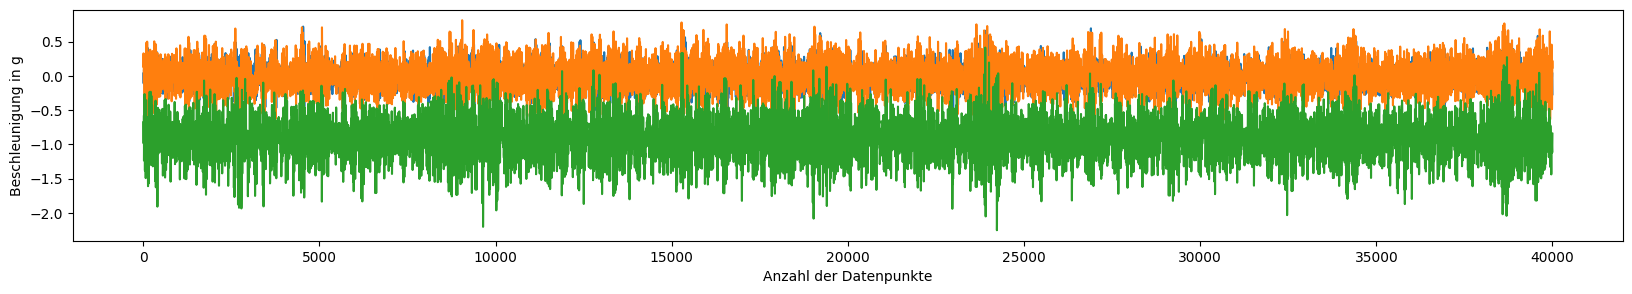

index:  99 label:  liftingandlowering


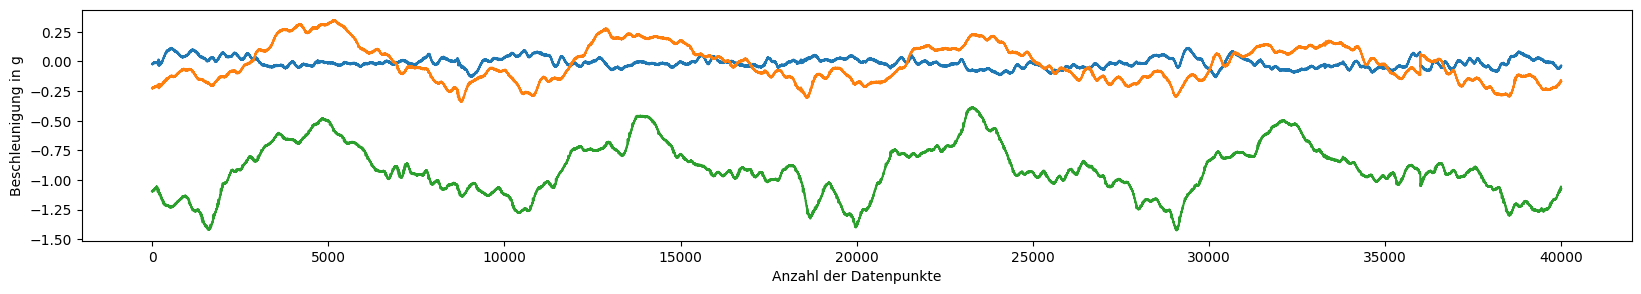

index:  101 label:  movingtable


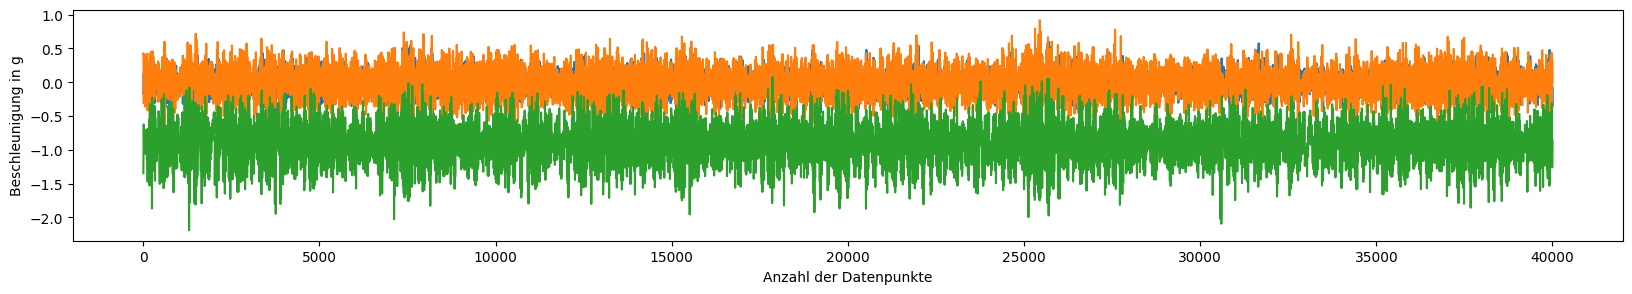

index:  102 label:  movingtable


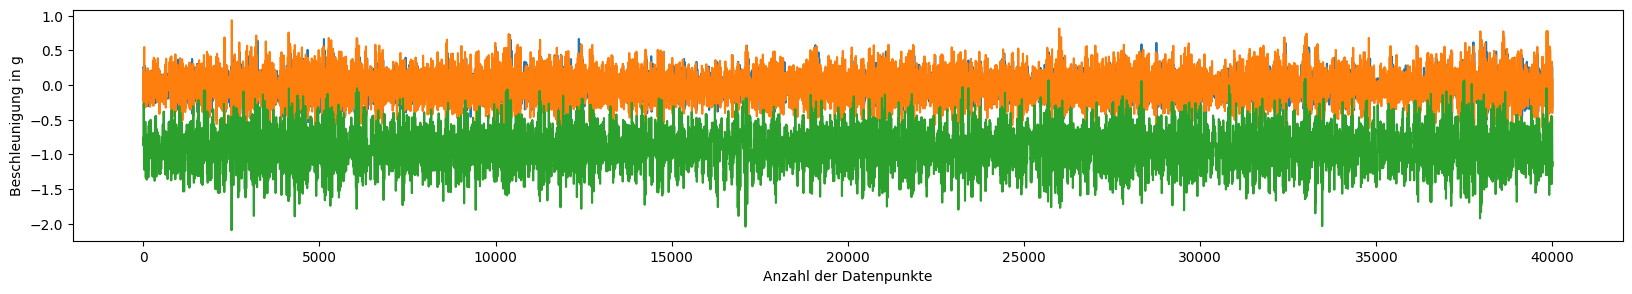

index:  103 label:  palletjack


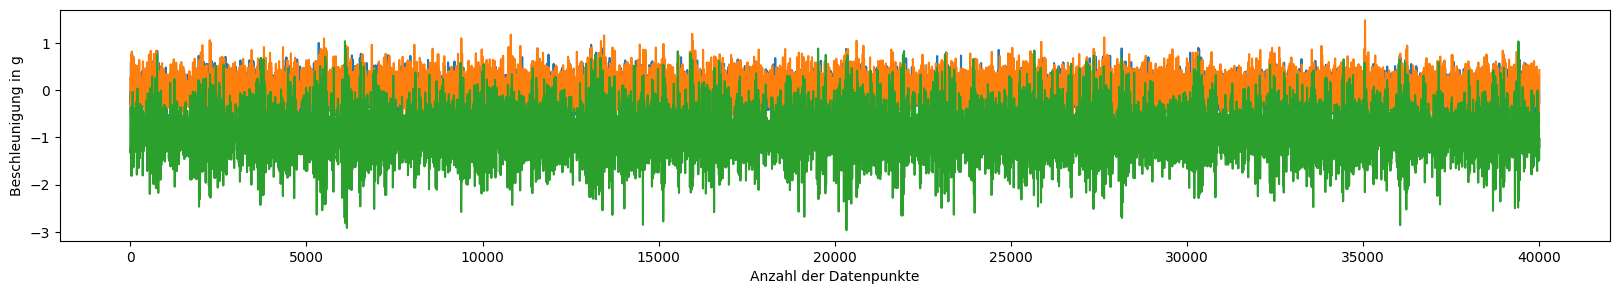

index:  104 label:  palletjack


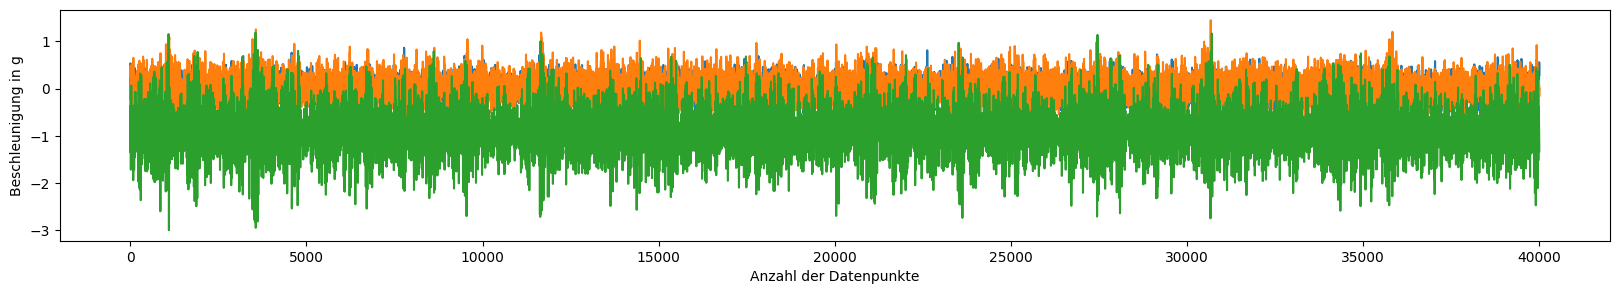

index:  105 label:  palletjack


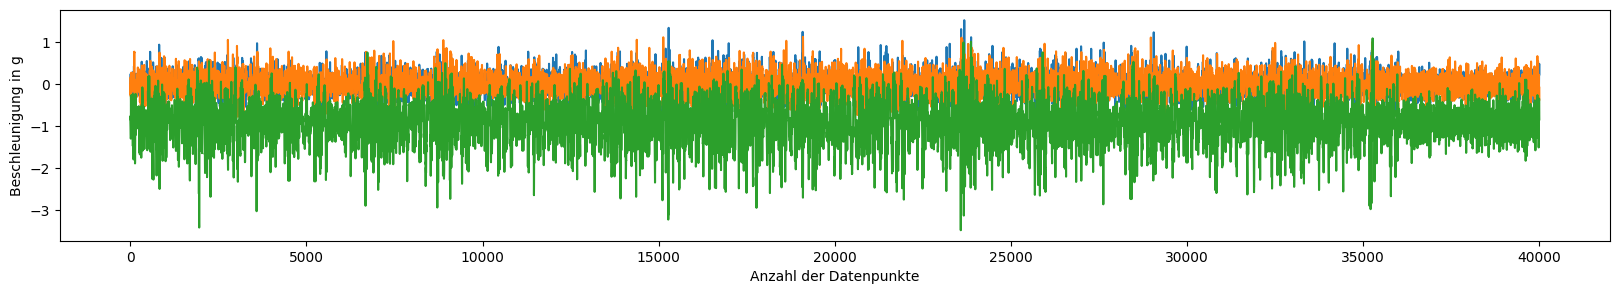

index:  111 label:  liftingandlowering


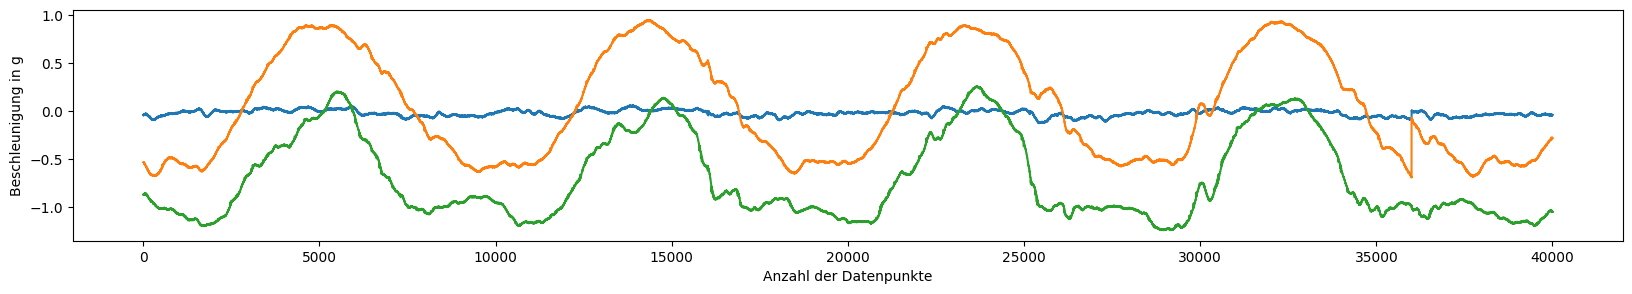

index:  118 label:  movingtable


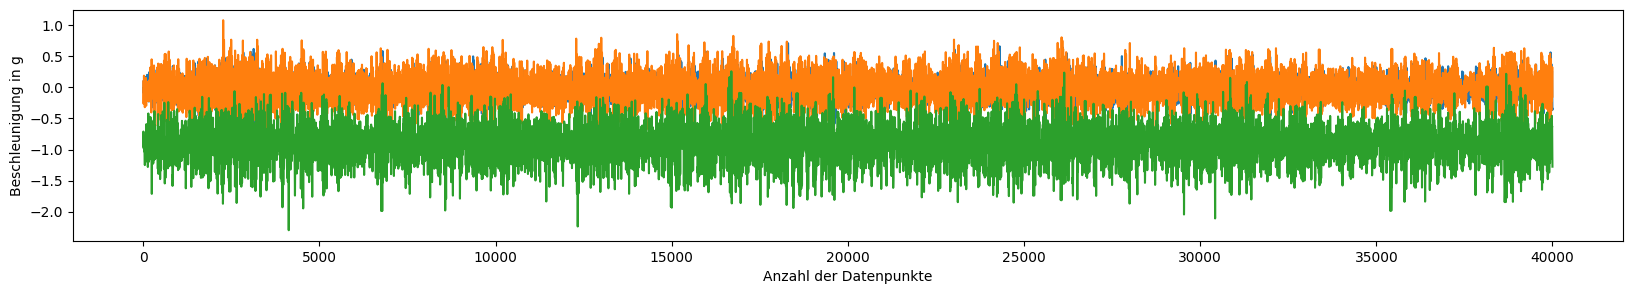

index:  121 label:  rotatehorizontally


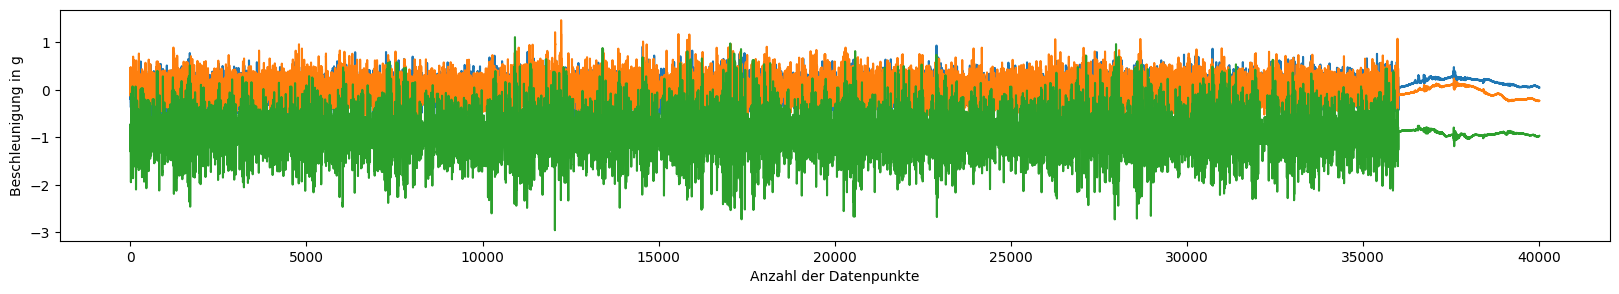

index:  122 label:  sacktrolley


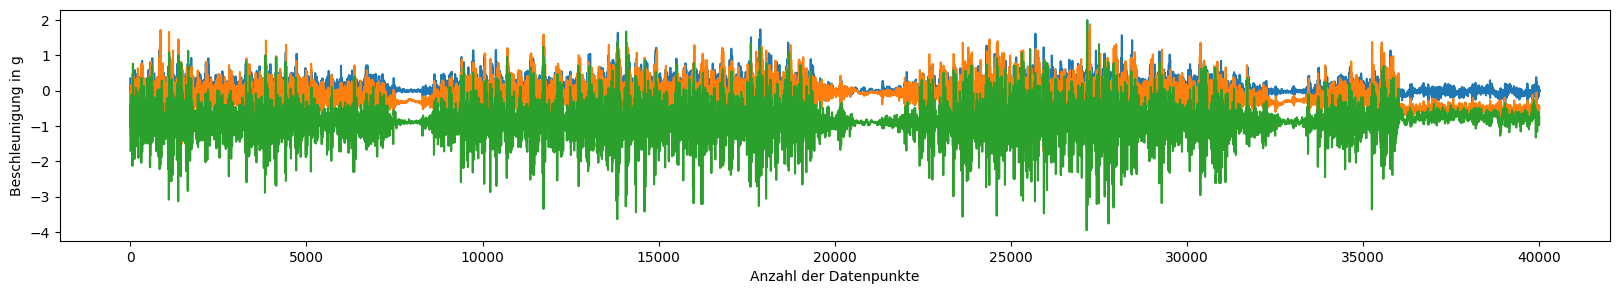

index:  126 label:  palletjack


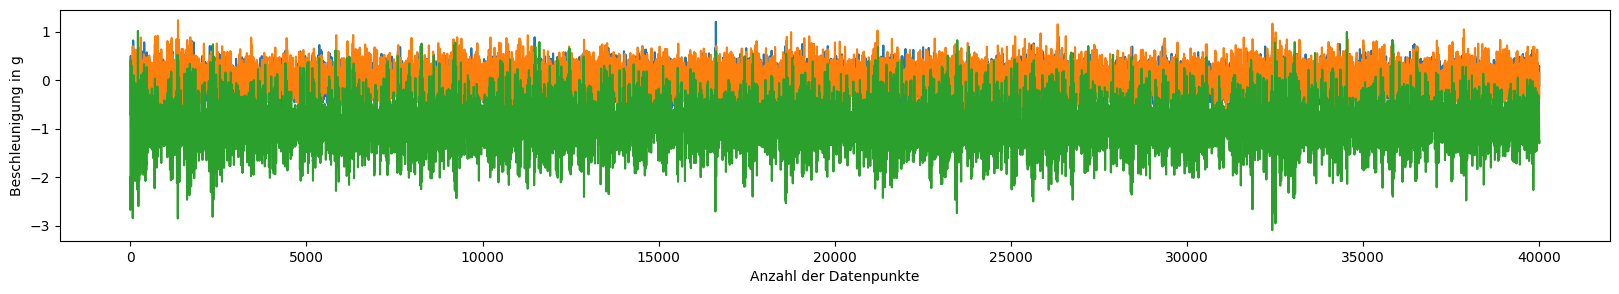

index:  130 label:  movingtable


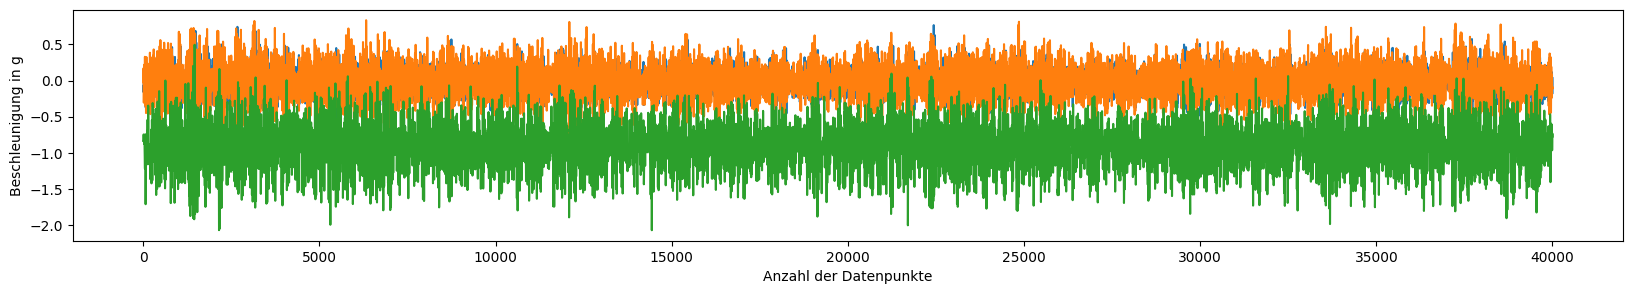

index:  131 label:  movingtable


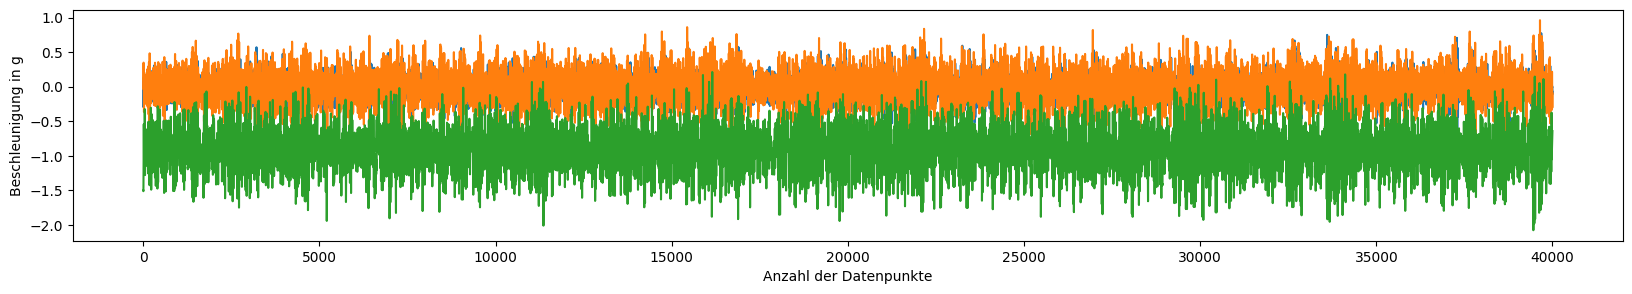

index:  132 label:  movingtable


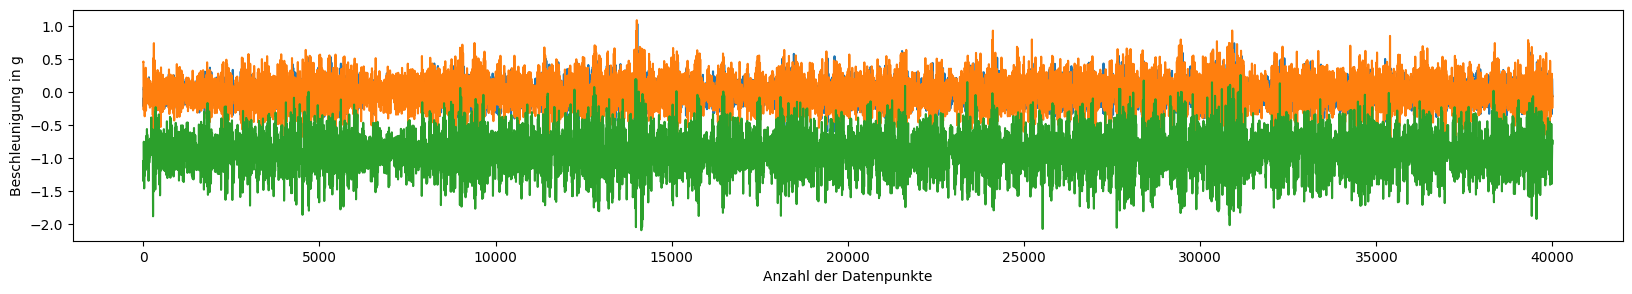

index:  133 label:  movingtable


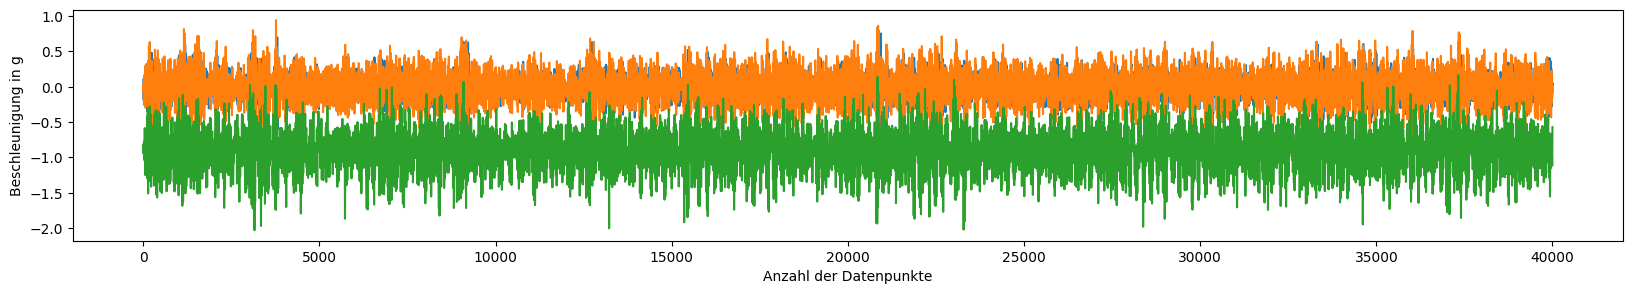

index:  135 label:  palletjack


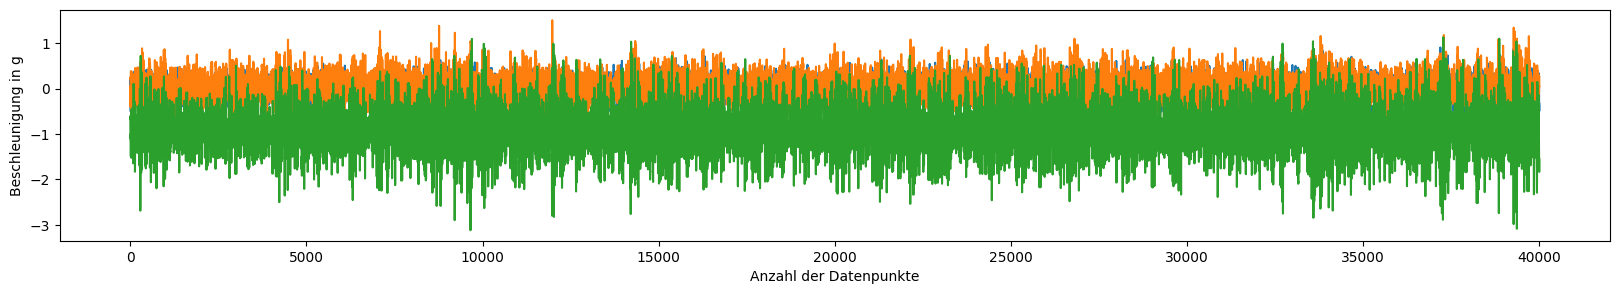

In [91]:
plotDatapointsViaIndicesOfLabel(acceleration_array, labels, indicesOfErrors)

In [62]:
# Assuming you have the DataFrame named 'df' with columns 'predicted' and 'actual'

# Create a crosstab of 'predicted' and 'actual' columns
confusion_matrix = pd.crosstab(df['predicted'], df['actual'])

# Printing the confusion matrix
print(confusion_matrix)

actual                   idle  largeloadcarriertrolley  liftingandlowering  \
predicted                                                                    
idle                       15                        0                   0   
largeloadcarriertrolley     0                       14                   0   
liftingandlowering          0                        0                   3   
palletjack                  0                        0                   0   
rollerconveyor              0                        1                   0   
rotatehorizontally          0                        0                   1   
sacktrolley                 0                        0                   0   
walking                     0                        0                  12   

actual                   movingtable  palletjack  rollerconveyor  \
predicted                                                          
idle                               0           0               0   
largeloadcarrie

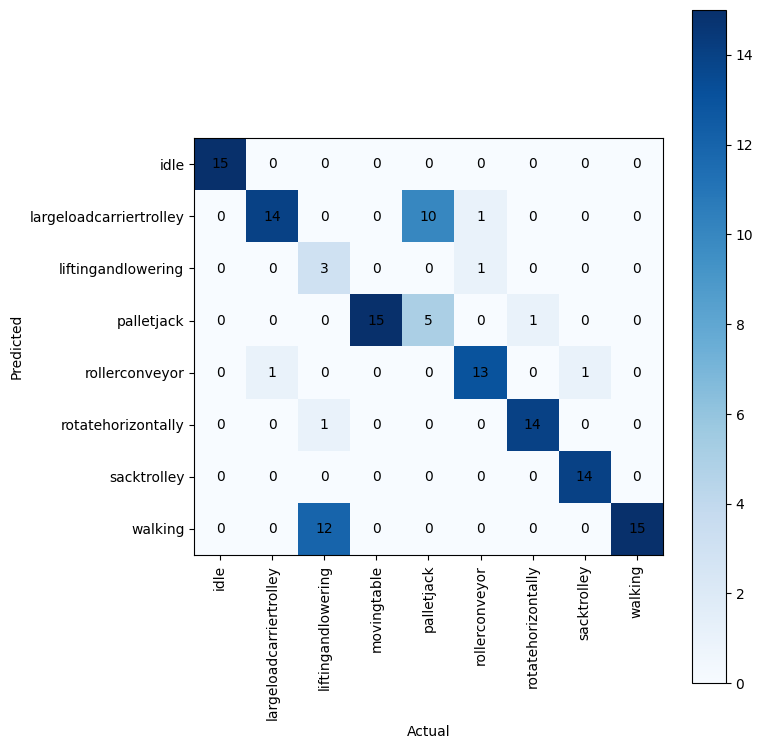

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have the confusion matrix stored in the variable 'confusion_matrix'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
im = ax.imshow(confusion_matrix, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(confusion_matrix.shape[1]))
ax.set_yticks(np.arange(confusion_matrix.shape[0]))
ax.set_xticklabels(confusion_matrix.columns, rotation=90)
ax.set_yticklabels(confusion_matrix.index)

# Add values to the plot
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        text = ax.text(j, i, confusion_matrix.iloc[i, j],
                       ha='center', va='center', color='black')

# Set axis titles
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

# Set colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show plot
plt.tight_layout()
plt.show()


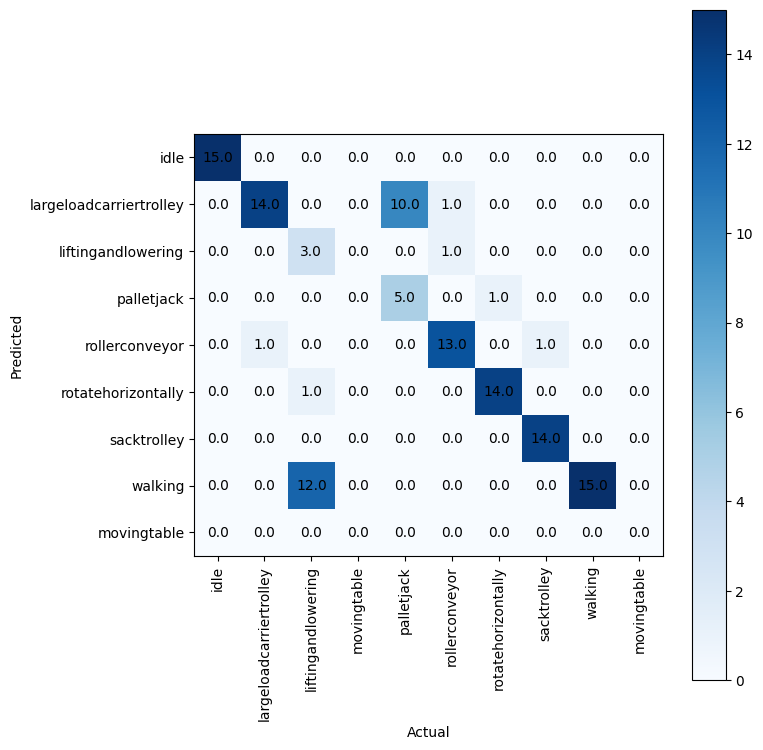

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have the confusion matrix stored in the variable 'confusion_matrix'

# Add an additional row and column for the "movingtable" label
confusion_matrix = confusion_matrix.reindex(index=confusion_matrix.index.append(pd.Index(["movingtable"])),
                                             columns=confusion_matrix.columns.append(pd.Index(["movingtable"])))
confusion_matrix.loc["movingtable", :] = 0
confusion_matrix.loc[:, "movingtable"] = 0

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
im = ax.imshow(confusion_matrix, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(confusion_matrix.shape[1]))
ax.set_yticks(np.arange(confusion_matrix.shape[0]))
ax.set_xticklabels(confusion_matrix.columns, rotation=90)
ax.set_yticklabels(confusion_matrix.index)

# Add values to the plot
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        text = ax.text(j, i, confusion_matrix.iloc[i, j],
                       ha='center', va='center', color='black')

# Set axis titles
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

# Set colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show plot
plt.tight_layout()
plt.show()


In [65]:
from sklearn.metrics import confusion_matrix

# Assuming you have the NumPy arrays 'ypred' and 'labels'

# Create the confusion matrix
cm = confusion_matrix(labels, ypred)

# Printing the confusion matrix
print(cm)


[[15  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  1  0  0  0]
 [ 0  0  3  0  0  0  1  0 12]
 [ 0  0  0  0 15  0  0  0  0]
 [ 0 10  0  0  5  0  0  0  0]
 [ 0  1  1  0  0 13  0  0  0]
 [ 0  0  0  0  1  0 14  0  0]
 [ 0  0  0  0  0  1  0 14  0]
 [ 0  0  0  0  0  0  0  0 15]]


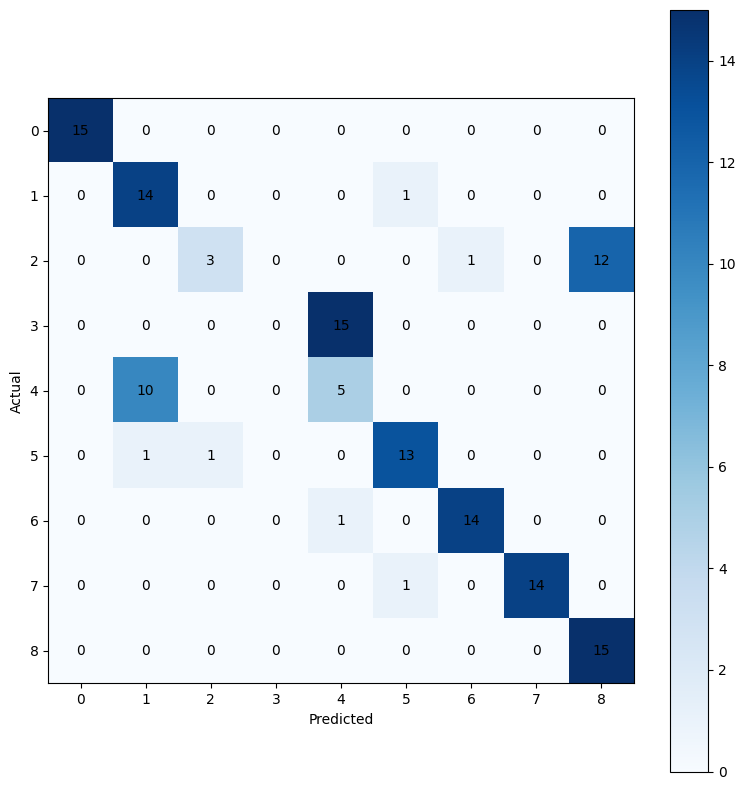

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix stored in the variable 'cm'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))

# Add values to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, cm[i, j],
                       ha='center', va='center', color='black')

# Set axis titles
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Set colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show plot
plt.tight_layout()
plt.show()


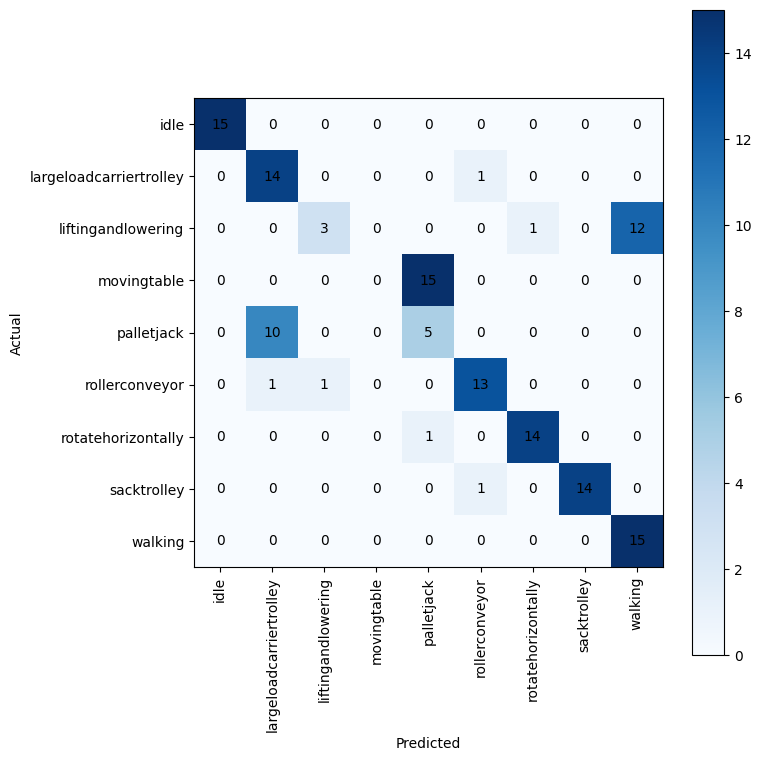

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix stored in the variable 'cm'
# Assuming you have the 'labels' array with unique class labels

# Get the unique class labels from the confusion matrix
unique_labels = np.unique(labels)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(unique_labels)))
ax.set_yticks(np.arange(len(unique_labels)))
ax.set_xticklabels(unique_labels, rotation=90)
ax.set_yticklabels(unique_labels)

# Add values to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, cm[i, j],
                       ha='center', va='center', color='black')

# Set axis titles
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Set colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show plot
plt.tight_layout()
plt.show()


In [68]:
from sklearn.metrics import f1_score

# Assuming you have the true labels in the 'labels' array and the predicted labels in the 'ypred' array

# Calculate the F1-score
f1 = f1_score(labels, ypred, average='weighted')

# Print the F1-score
print("F1-score:", f1)


F1-score: 0.6372331691297209
